## 準備

### サンプルデータのダウンロード
著者サイトで公開されているデータを使います。

http://hosho.ees.hokudai.ac.jp/~kubo/ce/IwanamiBook.html

In [1]:
import requests
import zipfile
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
%precision 3

'%.3f'

In [3]:
# 全カラムを表示させる
pd.set_option('display.max_columns', None)

### 例題データのダウンロード

In [4]:
# 著者サイトから3ファイル(data4a.csvとdata4b.csv, )をダウンロード
response = requests.get('http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/binomial/data4a.csv')
with open ('data4a.csv', 'wb') as f:
    f.write(response.content)
    f.close()
    
response = requests.get('http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/binomial/data4b.csv')
with open ('data4b.csv', 'wb') as f:
    f.write(response.content)
    f.close()

## 6.2 例題：上限のあるカウントデータ

In [5]:
# サンプルデータをロード
data = pd.read_csv('data4a.csv')

In [6]:
# 先頭5行の表示
data.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [7]:
data.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


In [8]:
data['f'].value_counts()

C    50
T    50
Name: f, dtype: int64

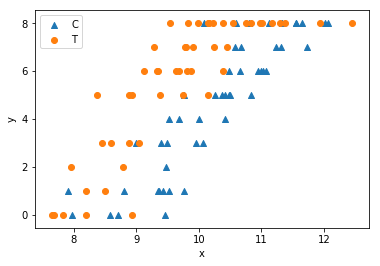

In [9]:
# 散布図
plt.scatter(data[data['f'] == 'C']['x'], data[data['f'] == 'C']['y'], marker='^', label='C')
plt.scatter(data[data['f'] == 'T']['x'], data[data['f'] == 'T']['y'], marker='o', label='T')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 6.3 二項分布で表現する「あり・なし」カウントデータ

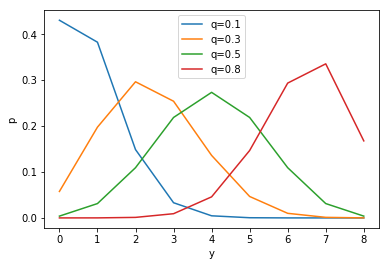

In [10]:
from scipy.stats import binom

plt.plot(range(9), [binom.pmf(y, 8, 0.1) for y in range(9)], label='q=0.1')
plt.plot(range(9), [binom.pmf(y, 8, 0.3) for y in range(9)], label='q=0.3')
plt.plot(range(9), [binom.pmf(y, 8, 0.5) for y in range(9)], label='q=0.5')
plt.plot(range(9), [binom.pmf(y, 8, 0.8) for y in range(9)], label='q=0.8')
plt.legend()
plt.xlabel('y')
plt.ylabel('p')
plt.show()

In [11]:
# 全てのyにおける確率pの総和を計算
print(sum([binom.pmf(y, 8, 0.1) for y in range(9)]))
print(sum([binom.pmf(y, 8, 0.3) for y in range(9)]))
print(sum([binom.pmf(y, 8, 0.5) for y in range(9)]))
print(sum([binom.pmf(y, 8, 0.8) for y in range(9)]))

1.0
1.0
1.0
1.0


## 6.4 ロジスティック回帰とロジットリンク関数

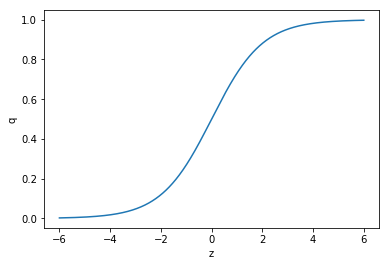

In [12]:
# ロジスティック関数
logistic = lambda z: 1 / (1 + math.exp(-z))
z = np.arange(-6.0, 6.01, 0.01)
plt.plot(z, [logistic(z_i) for z_i in z])
plt.xlabel('z')
plt.ylabel('q')
plt.show()

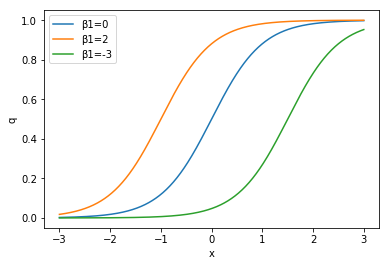

In [13]:
logistic = lambda z: 1 / (1 + math.exp(-z))
z = lambda beta1, beta2, x: [beta1 + beta2 * x_i for x_i in x] 
x = np.arange(-3.0, 3.01, 0.01)

# β2=2のときのロジスティック関数
plt.plot(x, [logistic(z_i) for z_i in z(0, 2, x)], label='β1=0')
plt.plot(x, [logistic(z_i) for z_i in z(2, 2, x)], label='β1=2')
plt.plot(x, [logistic(z_i) for z_i in z(-3, 2, x)], label='β1=-3')
plt.legend()
plt.xlabel('x')
plt.ylabel('q')
plt.show()

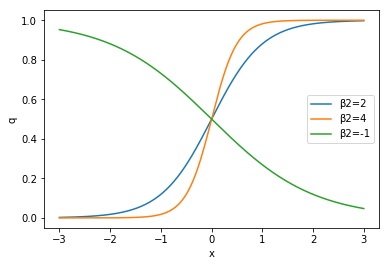

In [14]:
# β1=0のときのロジスティック関数
plt.plot(x, [logistic(z_i) for z_i in z(0, 2, x)], label='β2=2')
plt.plot(x, [logistic(z_i) for z_i in z(0, 4, x)], label='β2=4')
plt.plot(x, [logistic(z_i) for z_i in z(0,-1, x)], label='β2=-1')
plt.legend()
plt.xlabel('x')
plt.ylabel('q')
plt.show()

In [15]:
# 最尤推定
results = smf.glm(formula='y + I(N - y) ~ x + f', data=data, family=sm.families.Binomial()).fit(disp=0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Sun, 11 Feb 2018   Deviance:                       123.03
Time:                        22:19:20   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000       -22.307   -16.765
f[T.T]         2.0215      0.231      8.740      0.000         1.568     2.475
x              1.9524      0.139     14.059      0.000         1.680     2.225
==============================================================================
"""

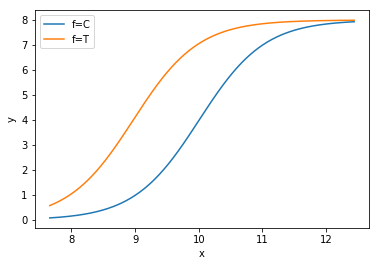

In [16]:
# 推定値からプロット(f=C)
z = lambda beta1, beta2, beta3, x: beta1 + beta2*x + beta3
x = np.arange(data['x'].min(), data['x'].max() + 0.01, 0.01)
plt.plot(x, [logistic(z_i) * 8 for z_i in z(results.params['Intercept'], results.params['x'], 0, x)], label='f=C')
plt.plot(x, [logistic(z_i) * 8 for z_i in z(results.params['Intercept'], results.params['x'], results.params['f[T.T]'], x)], label='f=T')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
formulas = [
    'y + I(N - y) ~ 1',
    'y + I(N - y) ~ x',
    'y + I(N - y) ~ f',
    'y + I(N - y) ~ x + f'
]
results = []

for formula in formulas:
    results.append(smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit(disp=0))
    
for i in range(4):
    print(formulas[i], ':', results[i].aic)

y + I(N - y) ~ 1 : 644.409341662
y + I(N - y) ~ x : 364.345443284
y + I(N - y) ~ f : 637.759753457
y + I(N - y) ~ x + f : 272.211129285


## 6.5 交互作用項の入った線形予測子

In [18]:
result = smf.glm(formula='y + I(N - y) ~ x + f + x:f', data=data, family=sm.families.Binomial()).fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Sun, 11 Feb 2018   Deviance:                       122.43
Time:                        22:19:42   Pearson chi2:                     109.
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000       -22.220   -14.827
f[T.T]        -0.0638      2.704     -0.024      0.981        -5.363     5.235
x              1.8525      0.186      9.983      0.000         1.489     2.216
x:f[T.T]       0.2163      0.280      0.772      0.440        -0.333     0.765
==============================================================================
"""

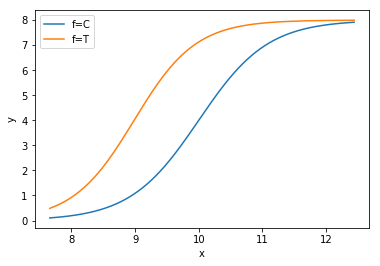

In [19]:
z = lambda beta1, beta2, beta3, beta4, x, f: beta1 + beta2*x + beta3*f+ x*f*beta4
x = np.arange(data['x'].min(), data['x'].max() + 0.01, 0.01)
plt.plot(x, [logistic(z_i) * 8 for z_i in z(result.params['Intercept'], result.params['x'], result.params['f[T.T]'], result.params['x:f[T.T]'], x, 0)], label='f=C')
plt.plot(x, [logistic(z_i) * 8 for z_i in z(result.params['Intercept'], result.params['x'], result.params['f[T.T]'], result.params['x:f[T.T]'], x, 1)], label='f=T')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
result.aic

273.611

## Red wine quality data setを使ったロジスティック回帰と交互作用項

In [48]:
# データセットのダウンロード
response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv')
with open ('winequality-red.csv', 'wb') as f:
    f.write(response.content)
    f.close()

In [49]:
# データセットのロード
wine = pd.read_csv('winequality-red.csv', sep=';')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
data = wine.loc[:, ['volatile acidity', 'alcohol', 'quality']]
data.rename(columns={'volatile acidity':'va', 'alcohol':'a', 'quality':'q'}, inplace=True)
data['N'] = 10

data.head()

,va,a,q,N
0,0.70,9.4,5,10
1,0.88,9.8,5,10
2,0.76,9.8,5,10
3,0.28,9.8,6,10
4,0.70,9.4,5,10


In [51]:
data.describe()

,va,a,q,N
count,1599.000000,1599.000000,1599.000000,1599.0
mean,0.527821,10.422983,5.636023,10.0
std,0.179060,1.065668,0.807569,0.0
min,0.120000,8.400000,3.000000,10.0
25%,0.390000,9.500000,5.000000,10.0
50%,0.520000,10.200000,6.000000,10.0
75%,0.640000,11.100000,6.000000,10.0
max,1.580000,14.900000,8.000000,10.0


In [29]:
data['q'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: q, dtype: int64

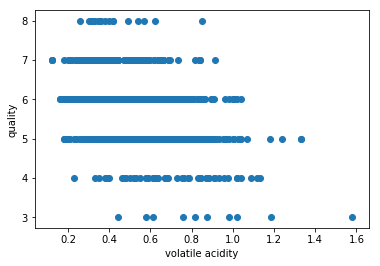

In [30]:
# volatile acidity(x軸)とquality(y軸)をプロット
plt.scatter(data['va'], data['q'], marker='o')
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()

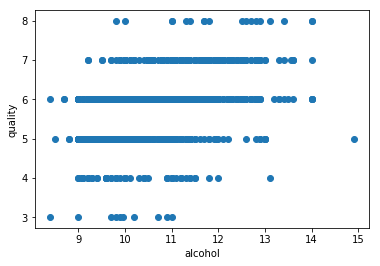

In [31]:
# alcohol(x軸)とquality(y軸)をプロット
plt.scatter(data['a'], data['q'], marker='o')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

### ロジスティック回帰

In [32]:
# 線形予測子volatile acidity + alcoholでロジスティック回帰
result = smf.glm(formula='q + I(N - q) ~ va + a', data=data, family=sm.families.Binomial()).fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['q', 'I(N - q)']   No. Observations:                 1599
Model:                            GLM   Df Residuals:                     1596
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2356.5
Date:                Sun, 11 Feb 2018   Deviance:                       296.82
Time:                        22:20:24   Pearson chi2:                     293.
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.7989      0.178     -4.483      0.000        -1.148    -0.450
va            -0.5650      0.091     -6.193      0.000        -0.744    -0.386
a              0.1300      0.016      8.363      0.000         0.100     0.161
==============================================================================
"""

In [33]:
# AICによるモデル選択
formulas = [
    'q + I(N - q) ~ 1',
    'q + I(N - q) ~ va',
    'q + I(N - q) ~ a',
    'q + I(N - q) ~ va + a'
]
results = []

for formula in formulas:
    results.append(smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit(disp=0))
    
for i in range(4):
    print(formulas[i], ':', results[i].aic)

q + I(N - q) ~ 1 : 4850.41413535
q + I(N - q) ~ va : 4787.83238835
q + I(N - q) ~ a : 4755.47557991
q + I(N - q) ~ va + a : 4719.06297588


### 交互作用項を含む線形予測子

In [34]:
result = smf.glm(formula='q + I(N - q) ~ va + a + va:a', data=data, family=sm.families.Binomial()).fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['q', 'I(N - q)']   No. Observations:                 1599
Model:                            GLM   Df Residuals:                     1595
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2356.4
Date:                Sun, 11 Feb 2018   Deviance:                       296.48
Time:                        22:20:29   Pearson chi2:                     293.
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.0838      0.522     -2.078      0.038        -2.106    -0.062
va            -0.0012      0.974     -0.001      0.999        -1.910     1.908
a              0.1570      0.049      3.208      0.001         0.061     0.253
va:a          -0.0538      0.092     -0.582      0.561        -0.235     0.127
==============================================================================
"""

In [35]:
result.aic

4720.725

## 6.6 割算値の統計モデリングはやめよう

In [21]:
# サンプルデータをロード
data = pd.read_csv('data4b.csv')

data.head()

,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0


In [22]:
# オフセット項にlog(A)を設定
result = smf.glm(formula='y ~ x', offset=np.log(data['A']), data=data, family=sm.families.Poisson()).fit(disp=0)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Sun, 11 Feb 2018   Deviance:                       81.608
Time:                        22:19:53   Pearson chi2:                     81.5
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000         0.885     1.061
x              1.0383      0.078     13.364      0.000         0.886     1.191
==============================================================================
"""

## 6.7 正規分布とその尤度

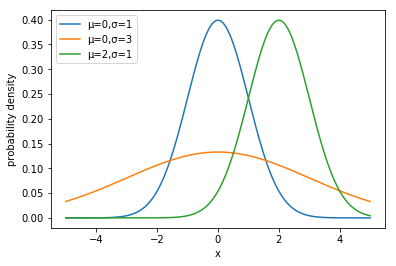

In [23]:
# 正規分布の確率密度関数
from scipy.stats import norm

x = np.arange(-5.00, 5.01, 0.01)

plt.plot(x, [norm.pdf(x_i, 0, 1) for x_i in x], label='μ=0,σ=1')
plt.plot(x, [norm.pdf(x_i, 0, 3) for x_i in x], label='μ=0,σ=3')
plt.plot(x, [norm.pdf(x_i, 2, 1) for x_i in x], label='μ=2,σ=1')
plt.legend()
plt.xlabel('x')
plt.ylabel('probability density')
plt.show()

In [24]:
# μ=0, σ=1の正規分布で、1.2≦y≦1.8の確率を計算する
norm.cdf(1.8, 0, 1) - norm.cdf(1.2, 0, 1)

0.079

## 6.8 ガンマ分布のGLM

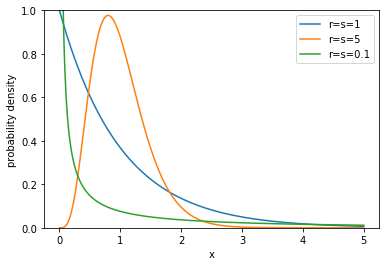

In [25]:
# ガンマ分布の確率密度関数
from scipy.stats import gamma

x = np.arange(0.00, 5.01, 0.01)

plt.plot(x, [gamma.pdf(x_i, a=1, scale=1/1) for x_i in x], label='r=s=1')
plt.plot(x, [gamma.pdf(x_i, a=5, scale=1/5) for x_i in x], label='r=s=5')
plt.plot(x, [gamma.pdf(x_i, a=0.1, scale=1/0.1) for x_i in x], label='r=s=0.1')
plt.ylim([0.0, 1.0])
plt.legend()
plt.xlabel('x')
plt.ylabel('probability density')
plt.show()

## Boston housing data setを使った正規分布とガンマ分布のGLM

In [57]:
from sklearn.datasets import load_boston

boston = load_boston()

data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['y'] = boston.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
data = data.loc[:, ['RM', 'LSTAT', 'y']]

data.head()

,RM,LSTAT,y
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [59]:
data.describe()

,RM,LSTAT,y
count,506.000000,506.000000,506.000000
mean,6.284634,12.653063,22.532806
std,0.702617,7.141062,9.197104
min,3.561000,1.730000,5.000000
25%,5.885500,6.950000,17.025000
50%,6.208500,11.360000,21.200000
75%,6.623500,16.955000,25.000000
max,8.780000,37.970000,50.000000


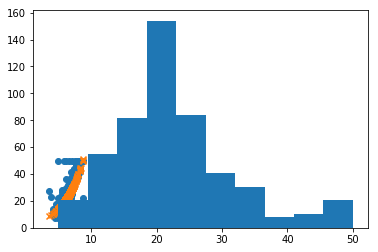

In [60]:
# 応答変数(y)の分布を確認
plt.hist(data['y'])
plt.show()

概ね平均値(22.53)付近をピークとする分布になっているが、40〜50に物件数の増加が見られる。

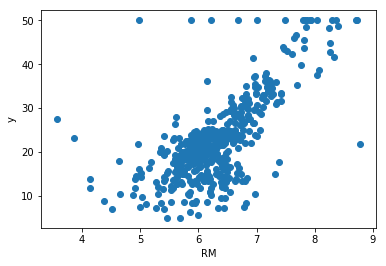

In [61]:
# RM(x軸)とy(y軸)をプロット
plt.scatter(data['RM'], data['y'], marker='o')
plt.xlabel('RM')
plt.ylabel('y')
plt.show()

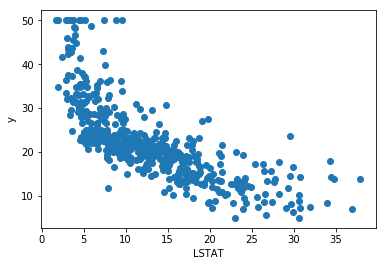

In [62]:
# LSTAT(x軸)とy(y軸)をプロット
plt.scatter(data['LSTAT'], data['y'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('y')
plt.show()

### 正規分布

In [63]:
# RMのみを説明変数として、正規分布で最尤推定
result = smf.glm(formula='y ~ RM', data=data, family=sm.families.Gaussian()).fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  506
Model:                            GLM   Df Residuals:                      504
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   43.7735698338
Method:                          IRLS   Log-Likelihood:                -1673.1
Date:                Sun, 11 Feb 2018   Deviance:                       22062.
Time:                        23:38:06   Pearson chi2:                 2.21e+04
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000       -39.864   -29.477
RM             9.1021      0.419     21.722      0.000         8.281     9.923
==============================================================================
"""

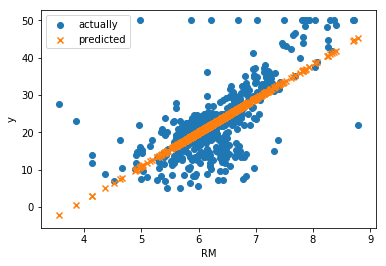

In [64]:
# 予測値をプロット
plt.scatter(data['RM'], data['y'], marker='o', label='actually')
plt.scatter(data['RM'], result.predict(), marker='x', label='predicted')
plt.legend()
plt.xlabel('RM')
plt.ylabel('y')
plt.show()

In [65]:
# RMのみを説明変数として、正規分布で最尤推定
result = smf.glm(formula='y ~ RM+LSTAT', data=data, family=sm.families.Gaussian()).fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  506
Model:                            GLM   Df Residuals:                      503
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                   30.6944516925
Method:                          IRLS   Log-Likelihood:                -1582.8
Date:                Sun, 11 Feb 2018   Deviance:                       15439.
Time:                        23:38:09   Pearson chi2:                 1.54e+04
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669        -7.577     4.860
RM             5.0948      0.444     11.463      0.000         4.224     5.966
LSTAT         -0.6424      0.044    -14.689      0.000        -0.728    -0.557
==============================================================================
"""

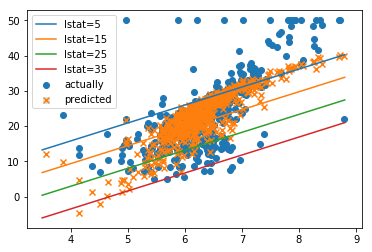

In [66]:
# LSTAT={5, 15, 25, 35}の場合で、予測値をプロット
lstat = [5, 15, 25, 35]
rm = np.arange(3.50, 8.81, 0.01)

z = lambda beta1, beta2, beta3, rm, lstat: beta1 + beta2*rm + beta3*lstat

# 実際の値をプロット
plt.scatter(data['RM'], data['y'], marker='o', label='actually')

# 予測値をプロット
plt.scatter(data['RM'], result.predict(), marker='x', label='predicted')

for l in lstat:
    plt.plot(rm, [z(result.params['Intercept'], result.params['RM'], result.params['LSTAT'], r, l) for r in rm], label='lstat={}'.format(l))
    
plt.legend()
plt.show()

### ガンマ分布

In [45]:
# RMのみを説明変数として、正規分布で最尤推定
result = smf.glm(formula='y ~ RM', data=data, family=sm.families.Gamma(link=sm.families.links.log)).fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  506
Model:                            GLM   Df Residuals:                      504
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                 0.0968929186008
Method:                          IRLS   Log-Likelihood:                -1658.9
Date:                Sun, 11 Feb 2018   Deviance:                       47.467
Time:                        22:21:07   Pearson chi2:                     48.8
No. Iterations:                     9                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9379      0.125      7.524      0.000         0.694     1.182
RM             0.3411      0.020     17.300      0.000         0.302     0.380
==============================================================================
"""

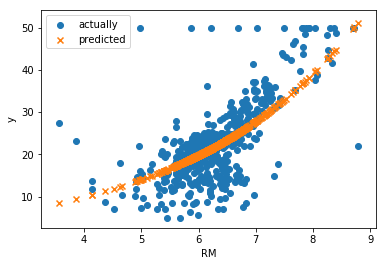

In [46]:
# 予測値をプロット
plt.scatter(data['RM'], data['y'], marker='o', label='actually')
plt.scatter(data['RM'], result.predict(), marker='x', label='predicted')
plt.legend()
plt.xlabel('RM')
plt.ylabel('y')
plt.show()